In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
data=pd.read_csv(r"C:\Users\safreena\Desktop\Assignments ExcelR\Random Forests\Datasets\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:>

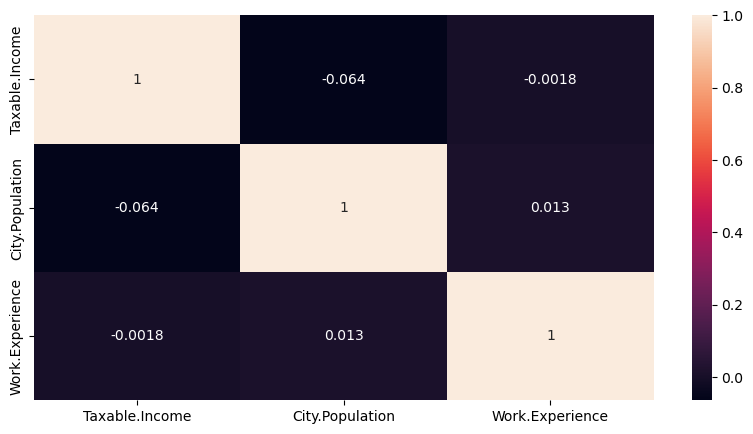

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [8]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(data[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

C:\Users\safreena\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


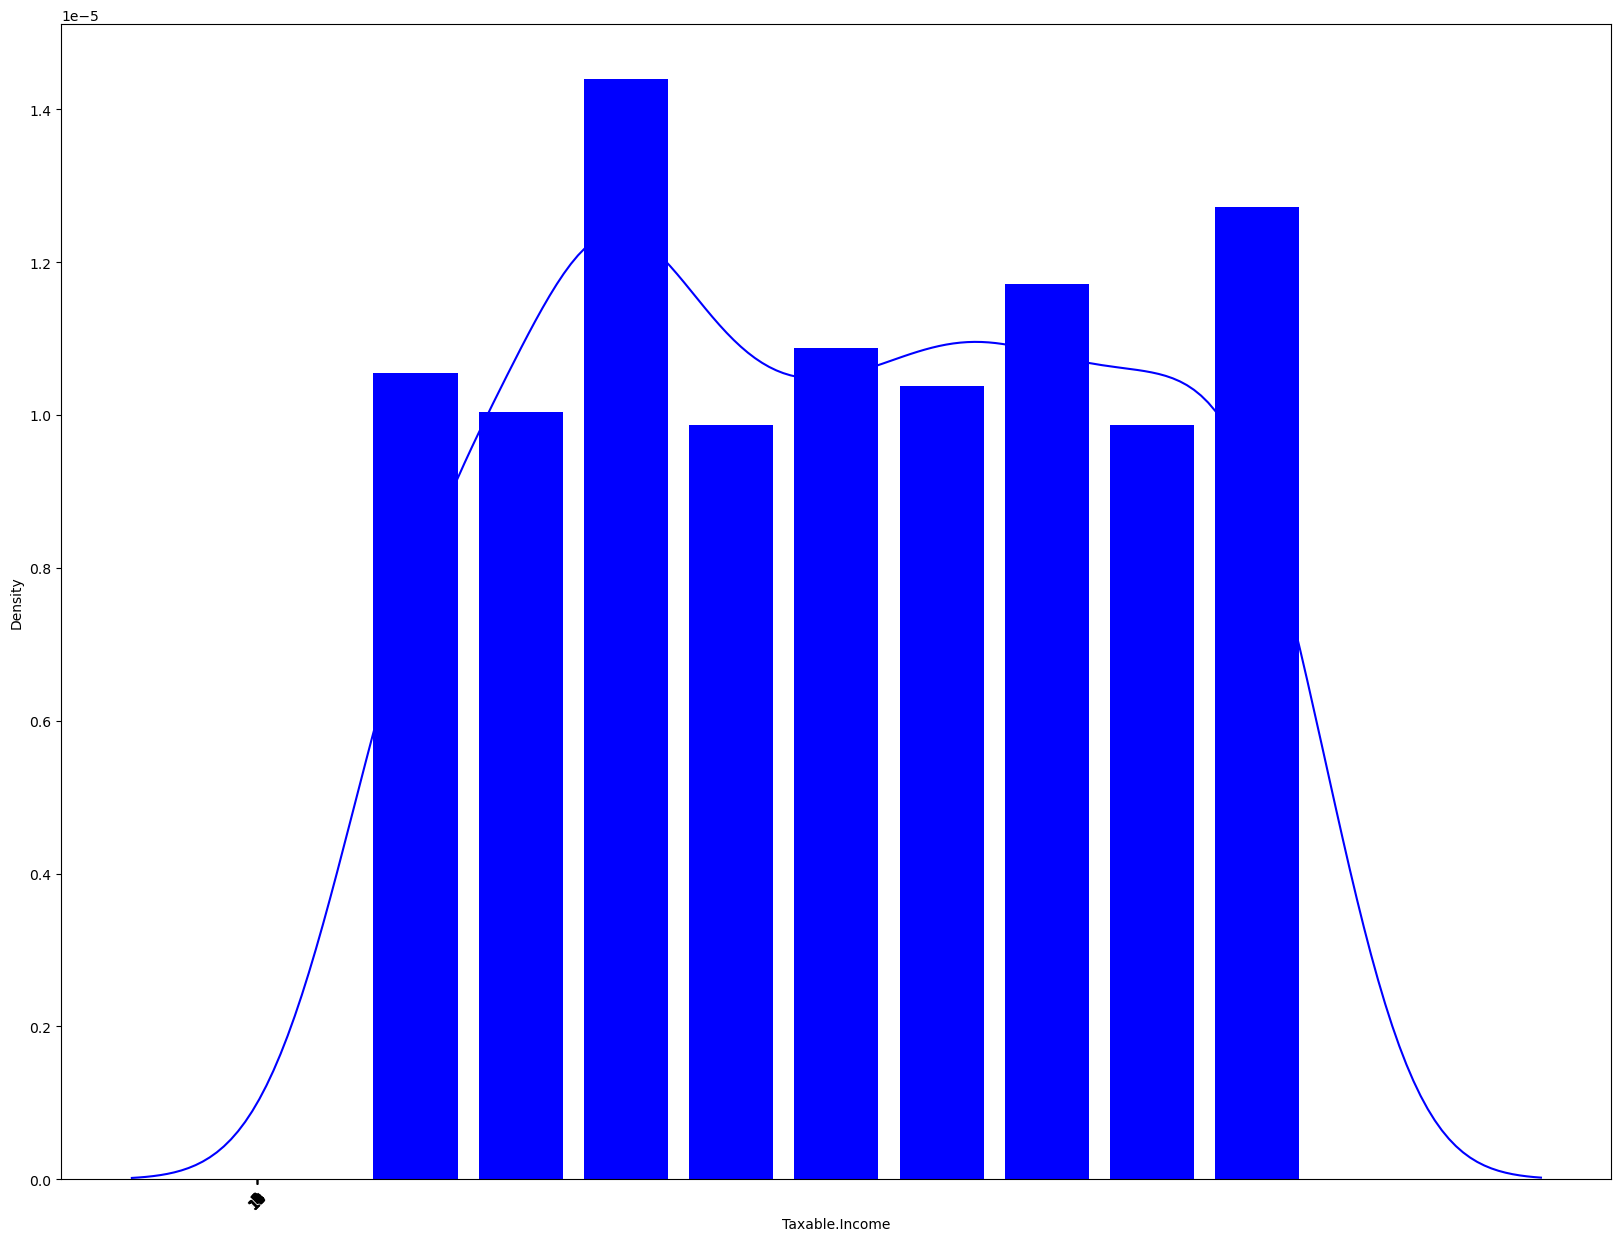

In [9]:
distplot("Taxable.Income")

In [10]:
data = pd.get_dummies(data, columns = ['Undergrad','Marital.Status','Urban'])
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [11]:
data["TaxableIncome"]="good"
data.loc[data["Taxable.Income"]<= 30000,"TaxableIncome"]="risk"
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [12]:
array=data.values

In [13]:
data.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxableIncome
0,50047,10,1,0,0,0,1,0,1,good
1,134075,18,0,1,1,0,0,0,1,good
2,160205,30,1,0,0,1,0,0,1,good
3,193264,15,0,1,0,0,1,0,1,good
4,27533,28,1,0,0,1,0,1,0,good


In [14]:
x = array[:,0:9]
y = array[:,9]

In [15]:
## spliting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

In [16]:
###applying RF

In [17]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test,y_pred)

Accuracy = 73.33333333333333


array([[88,  7],
       [25,  0]], dtype=int64)

In [18]:
y_pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'risk',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risk',
       'good', 'good', 'good', 'good', 'good', 'good', 'risk', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'risk', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risk', 'good', 'good', 'good', 'good', 'good', 'risk', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

In [19]:
## actual value and predicted value

In [20]:
df=pd.DataFrame({"actual":y_test,"predicted":y_pred})
df

,actual,predicted
0,good,good
1,good,good
2,good,good
3,good,good
4,good,good
...,...,...
115,good,risk
116,good,good
117,risk,good
118,good,good


In [21]:
column=data.columns
column

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'TaxableIncome'],
      dtype='object')

In [22]:
column=column.drop("TaxableIncome")

In [23]:
##feature importance
feature=model.feature_importances_
feature

array([0.53187738, 0.34271922, 0.01920539, 0.01955949, 0.01667514,
       0.01718296, 0.01564038, 0.01912779, 0.01801225])

In [24]:
df1=pd.DataFrame({"column":column,"importance":feature})
df1.sort_values("importance",ascending=False)

,column,importance
0,City.Population,0.531877
1,Work.Experience,0.342719
3,Undergrad_YES,0.019559
2,Undergrad_NO,0.019205
7,Urban_NO,0.019128
8,Urban_YES,0.018012
5,Marital.Status_Married,0.017183
4,Marital.Status_Divorced,0.016675
6,Marital.Status_Single,0.015640


city population have high importance